## import 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import seaborn as sns
import string
import warnings
%matplotlib inline

#warnings.filterwarnings("ignore")

#pandas - used to perform data manipulation and analysis

#numpy - used to perform a wide variety of mathematical operations on arrays

#matplotlib - used for data visualization and graphical plotting

#seaborn - built on top of matplotlib with similar functionalities

#re – used as a regular expression to find particular patterns and process it

#string – used to obtain information in the string and manipulate the string overall

#nltk –  a natural language processing toolkit module associated in anaconda

#warnings - to manipulate warnings details

#%matplotlib - to enable the inline plotting

## Loading the datasets


In [2]:
df=pd.read_csv('Twitter Sentiments.csv')
df.head()

#pd.read_csv()      loads the csv(comma seperated value) data into a dataframe

#df.head()      displays the 5 first rows from the dataframe

#Zero (0) indicates it’s a positive sentiment.

#One (1) indicates it’s a negative sentiment (racist/sexist).

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 624.3+ KB


## Preprocessing the datasets

In [4]:
#remove pattern in the input text
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern, input_txt)
    for word in r:
        input_txt=re.sub(word,"",input_txt)
    return input_txt

#This function works to remove certain patterns in the text for preprocessing


In [5]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
#remove twitter handles(@user)
df['clean_tweet']=np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")

#"@[\w]*" is the twitter handle pattern to remove in the text for preprocessing

In [7]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
#remove special characters , numbers and punctuation
df['clean_tweet']=df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [9]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [10]:
#individual words considered as tokens
tokenized_tweet=df['clean_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()
#Individual words separated as tokens to facilitate further processing as strings

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [11]:
#stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet=tokenized_tweet.apply(lambda sentence:[stemmer.stem(word)for word in sentence])
tokenized_tweet.head()

#Stemmer.stem() converts certain words into its simpler version.

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [12]:
#combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=" ".join(tokenized_tweet[i])
    
df['clean_tweet']=tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


## Exploratory Data Analysis


In [13]:
!pip install wordcloud

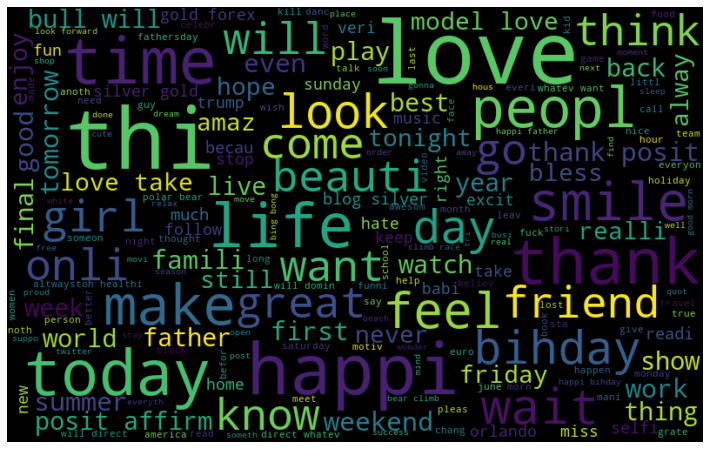

In [14]:
# visualize the frequent words
all_words=" ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

#Filtering all frequent words from the data to plot graph using the wordcloud
#The plot displaying many positive words and a few negative words 

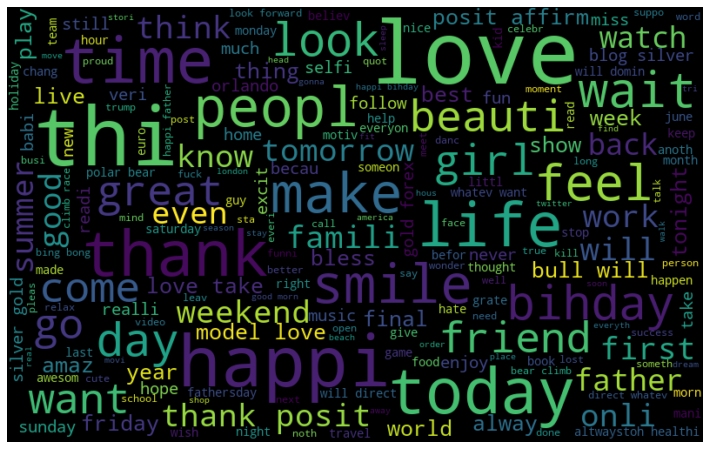

In [15]:
#frequent words visulatization for +ve
all_words=" ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])


wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

#Filtering more frequent positive words adding a new parameter [df['label']==0]]) indicating positive sentiments
#Comparing with the previous plot graph, there’s more positive words

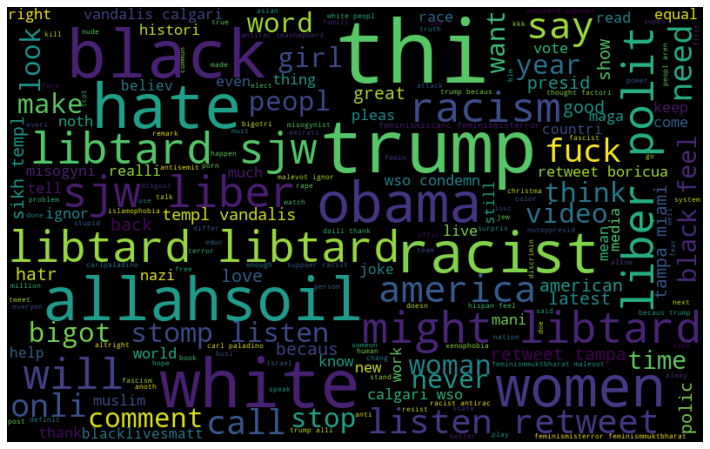

In [16]:
#frequent words visualization for -ve
all_words=" ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])


wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

#For the negative sentiment it’s exactly the same code but changing the value of label to one (1), filtering racist/sexist words used.

In [17]:
#extract the hastag
def hashtag_extract(tweets):
    hashtags=[]
    #loop words in the tweet
    for tweet in tweets:
        ht=re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags
#Extraction of all racist and non-racist hashtag content in the tweets, returning a list of hashtags

In [18]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

In [19]:
#extraction hastags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [20]:
ht_positive[:5]
#Viewing the list of the extracted positive hashtags, in this example we are listing five for a simple view.

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [21]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])
#Filtering and cleaning the words in the sentence for a better visualization and processing

In [22]:
ht_positive[:5]
#Listing the words to view the results, now it can be processed more efficiently.

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [23]:
freq=nltk.FreqDist(ht_positive)
d=pd.DataFrame({'Hashtag':list(freq.keys()),
                'counts':list(freq.values())})
d.head()
#Conversion of the dictionary into a dataframe to list positive hashtags with count

,Hashtag,counts
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


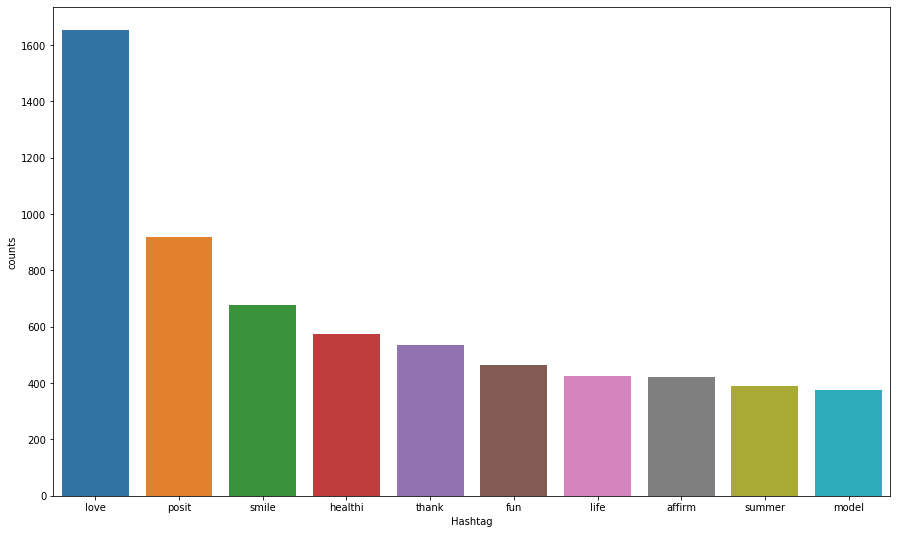

In [25]:
# select top 10 hashtags
d = d.nlargest(columns='counts', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='counts')
plt.show()

#Visualization through a bar graph for top ten positive hashtags with high frequency

In [26]:
freq=nltk.FreqDist(ht_negative)
d=pd.DataFrame({'Hashtag':list(freq.keys()),
               'counts':list(freq.values())})
d.head()

#Conversion of the dictionary into a dataframe to list negative hashtags with count

,Hashtag,counts
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


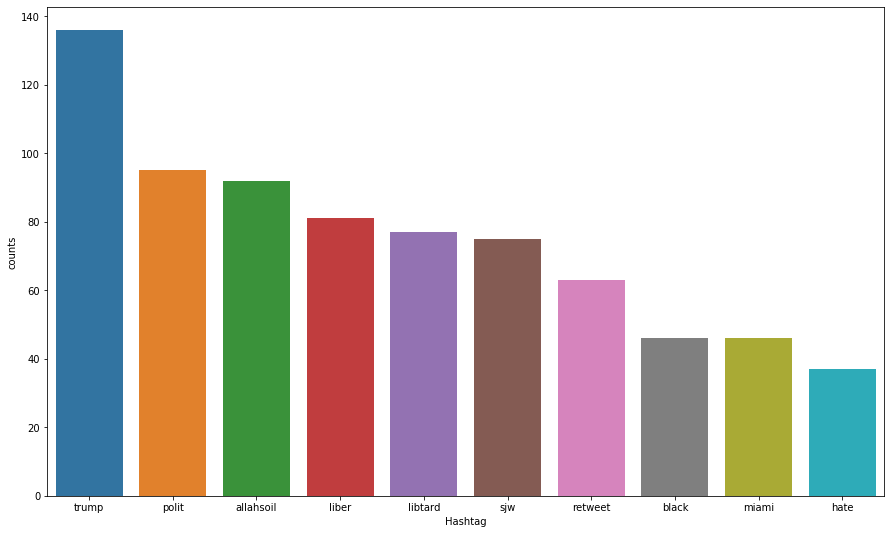

In [28]:
# select top 10 hashtags
d = d.nlargest(columns='counts', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='counts')
plt.show()
#Visualization through a bar graph for top ten negative hashtags with high frequency.

## Input Split
The Input Split is a pre-process step for feature selection or feature extraction of the words in order to convert them into vectors for the machine to understand.

In [33]:
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(df['clean_tweet'])
#Extraction of the data into vectors for training and testing

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bow,df['label'],random_state=42,test_size=0.25)
#Splitting the data for training and testing with test size of 25%

## model training 


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [36]:
#training
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
#testing 
pred=model.predict(x_test)
f1_score(y_test,pred)

0.49763033175355453

In [38]:
accuracy_score(y_test,pred)

0.9469403078463271

In [39]:
#f1_score() and accuracy_score() gives the performance metrics of the model for the test data.

In [41]:
#use probability to get output
pred_prob= model.predict_proba(x_test)
pred=pred_prob[:,1]>=0.3
pred=pred.astype(np.int)
f1_score(y_test,pred)
#Predict probability feature to receive a output in probability value
#pred_prob[: , 1] >= 0.3 if result is greater than 30 percent it will assign 1, else it will assign 0
#pred.astype(np.int) assign the value to an integer

0.5545722713864307

In [42]:
accuracy_score(y_test,pred)

0.9433112251282693

In [43]:
#The scores have been improved by using the probability values with threshold

In [44]:
pred_prob[0][1] >= 0.3

False